In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo = pd.read_csv("atmotree.csv",names=head_list,header=None,index_col=False)
pdk = pd.read_csv("pdktree.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [4]:
atmo.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,4,3,8,0,0,2.80234,0.00000,32.28260,0.00000,0,0.181436,0.000000,2,4324.7500,0
1,2,0,3,0,0,7.25686,3.42414,22.88710,3.26208,0,0.155040,0.638613,2,65.1302,0
2,2,0,3,0,0,16.05470,24.33140,9.66974,2.66706,0,0.109716,0.365521,2,83.0714,0
3,2,0,3,0,0,9.95274,16.83320,27.91820,18.74930,0,0.169489,0.887705,2,78.9774,0
4,4,0,5,0,0,4.32084,3.04405,91.82640,5.22213,0,0.321967,0.000000,2,2062.8600,0


In [5]:
pdk.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,2,0,3,0,0,6.58654,5.87317,48.6192,15.53310,0,0.222760,0.657262,2,1333.5800,1
1,2,0,3,0,0,8.64484,4.02827,51.2072,7.49073,0,0.228995,0.709013,2,564.0920,1
2,3,0,4,0,0,5.81910,39.44040,14.6574,3.74200,0,0.128947,0.298063,1,284.0100,1
3,2,0,3,0,0,10.86520,11.28500,34.3021,22.75140,0,0.186802,0.799846,3,92.4554,1
4,2,0,3,0,0,9.38759,9.70459,50.4080,12.87600,0,0.227076,0.868688,1,56.5050,1


In [6]:
pdk_df = atmo
pdk_df=pdk_df.append(pdk,ignore_index=True)
pdk_df=pdk_df.drop(["trkE","EmE","visE"],axis=1)

In [7]:
import seaborn as sb

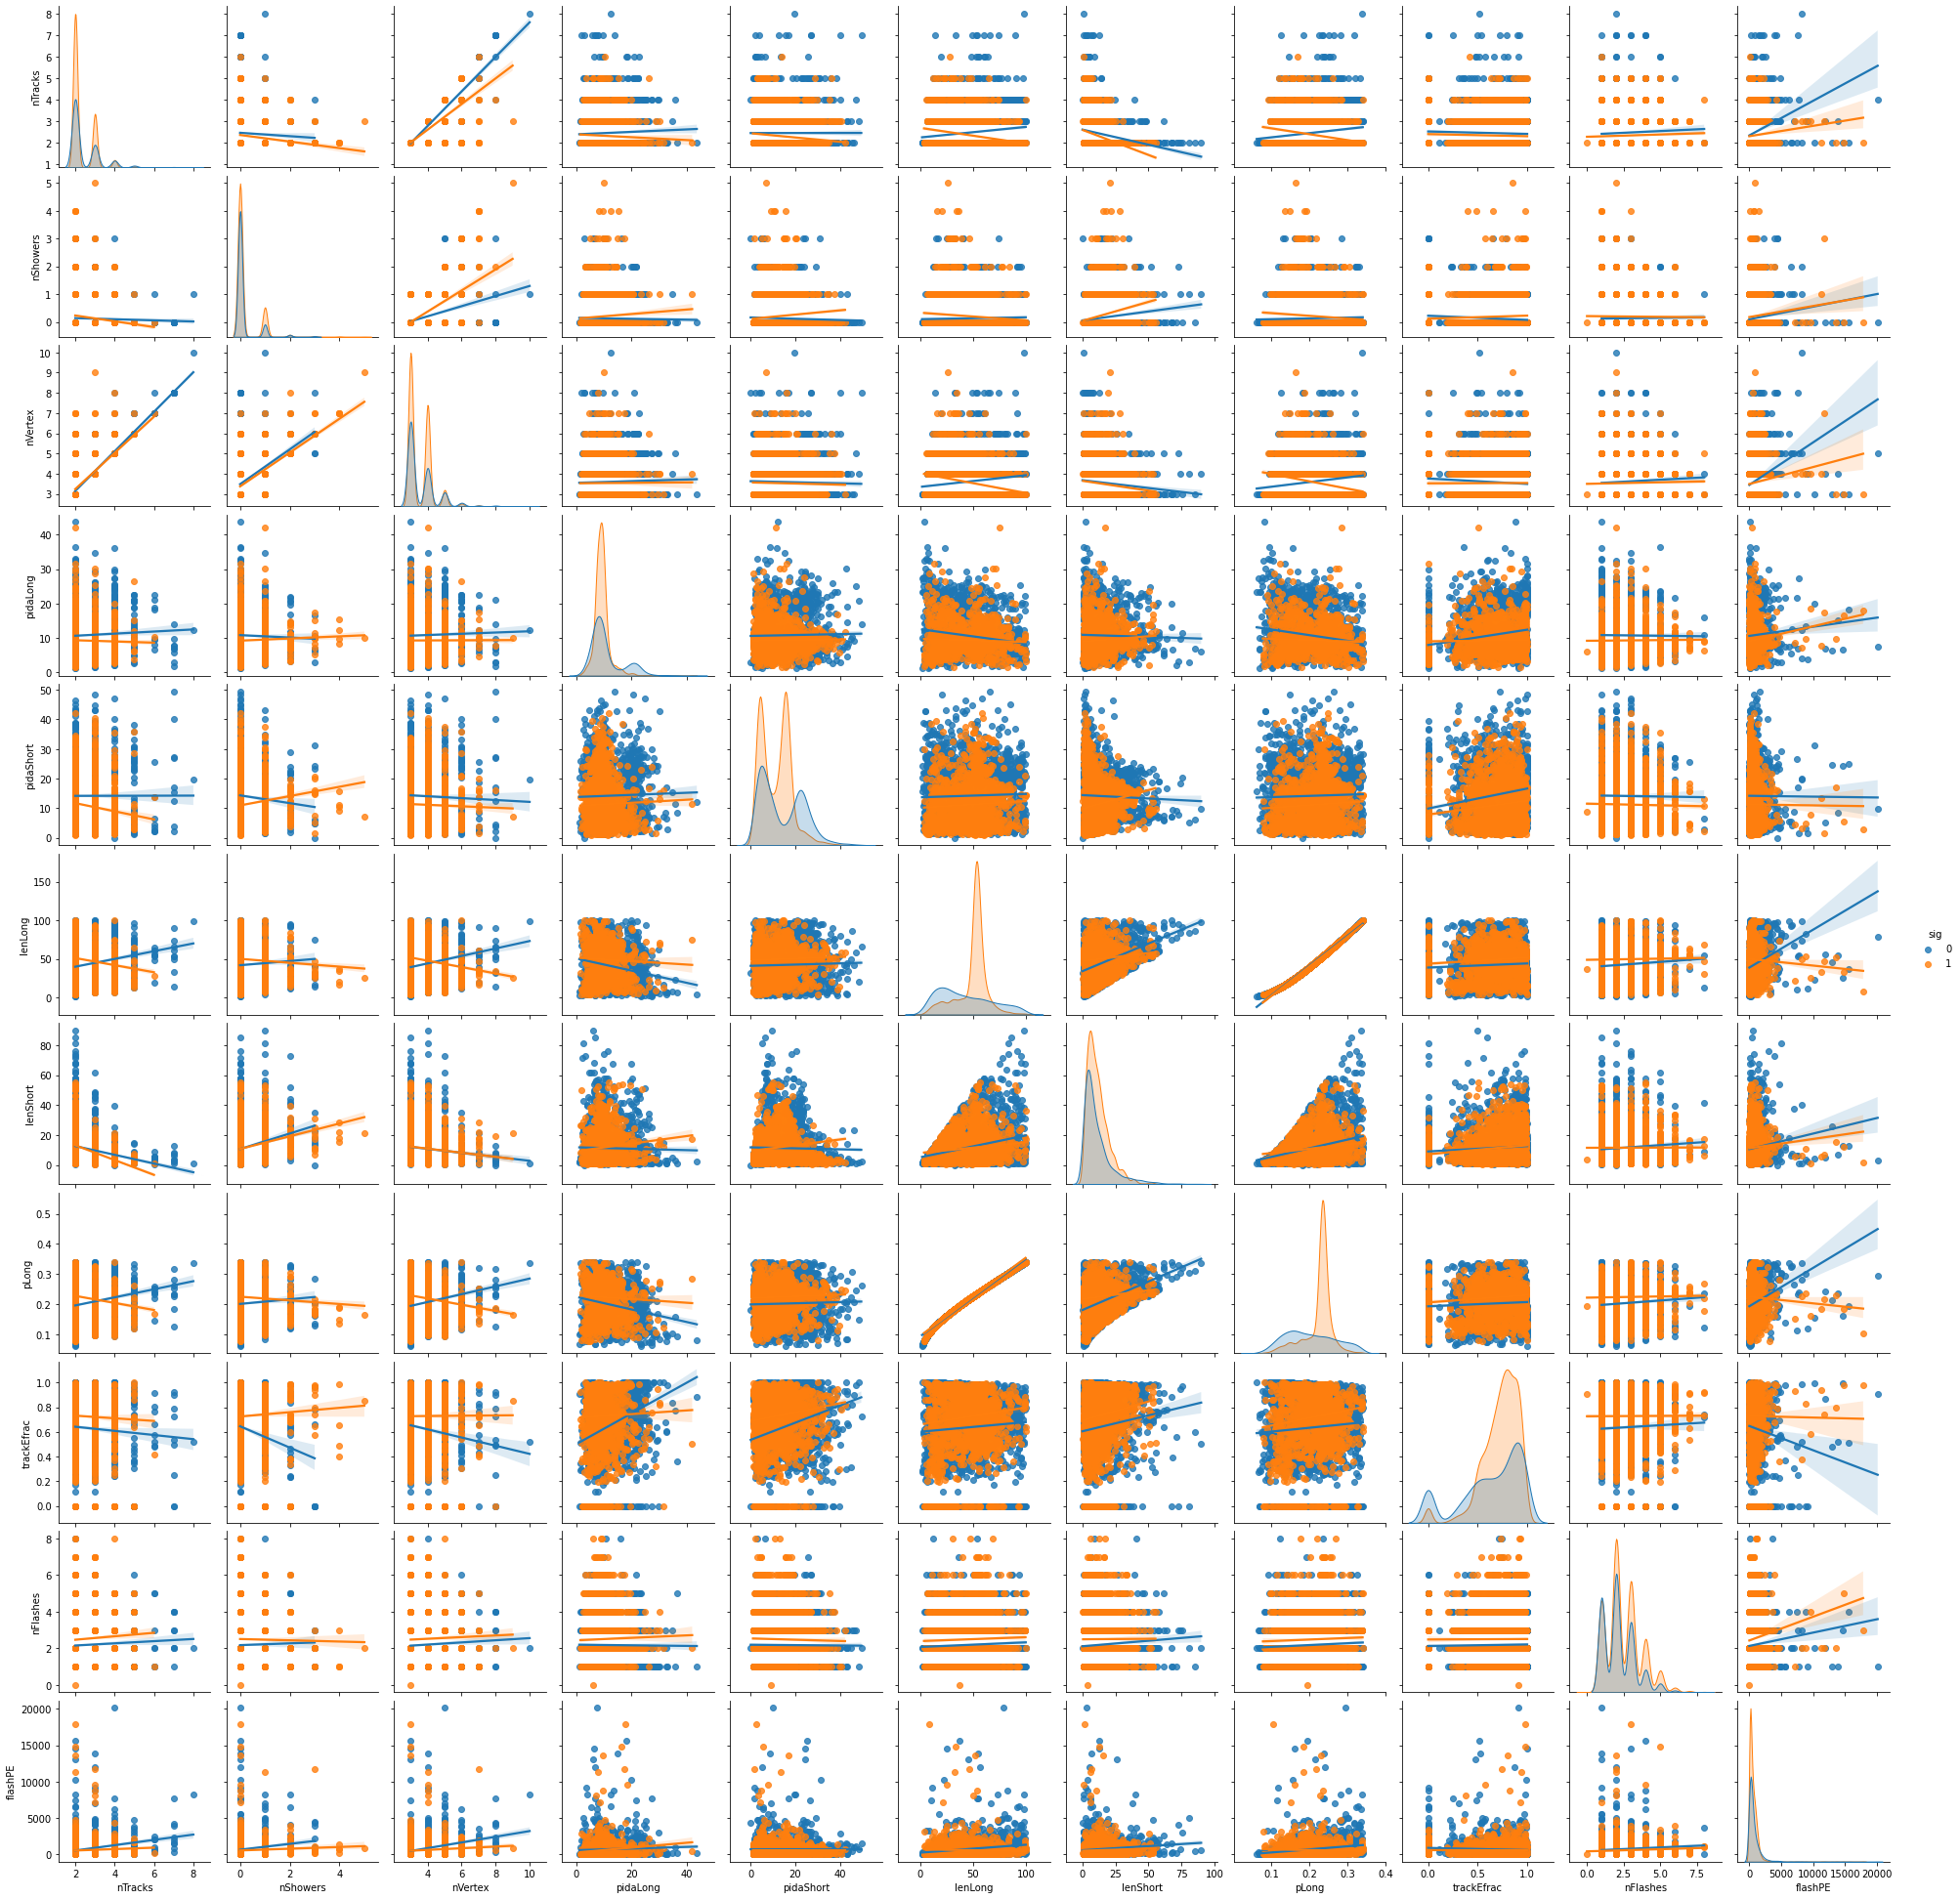

In [8]:
sb.pairplot(data=pdk_df,kind="reg",hue="sig")

In [9]:
pdk_target = pdk_df.sig

### Pull off the "signal" column to use as the target for our ML models

In [10]:
pdk_target
pdk_df=pdk_df.drop(["sig"],axis=1)

### Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [11]:
X_train, X_test, y_train, y_test =train_test_split(pdk_df, pdk_target, test_size = 0.3)
X_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
1219,2,0,3,8.49676,22.4287,84.4359,7.78665,0.305492,0.816703,2,260.495
4945,3,0,4,9.25205,16.1817,54.5972,4.97259,0.237079,0.828941,2,186.241
3183,2,1,4,10.49650,15.3369,53.6165,9.12304,0.234750,0.765738,2,1666.090
1142,2,1,4,7.12649,23.3566,30.9370,6.54684,0.177806,0.838585,3,120.220
2008,2,0,3,9.24724,23.5981,37.0974,10.74800,0.194083,0.579621,2,232.609


In [12]:
y_train.head()

1219    0
4945    1
3183    1
1142    0
2008    0
Name: sig, dtype: int64

In [13]:
from sklearn import tree
from sklearn import svm

## Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [14]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

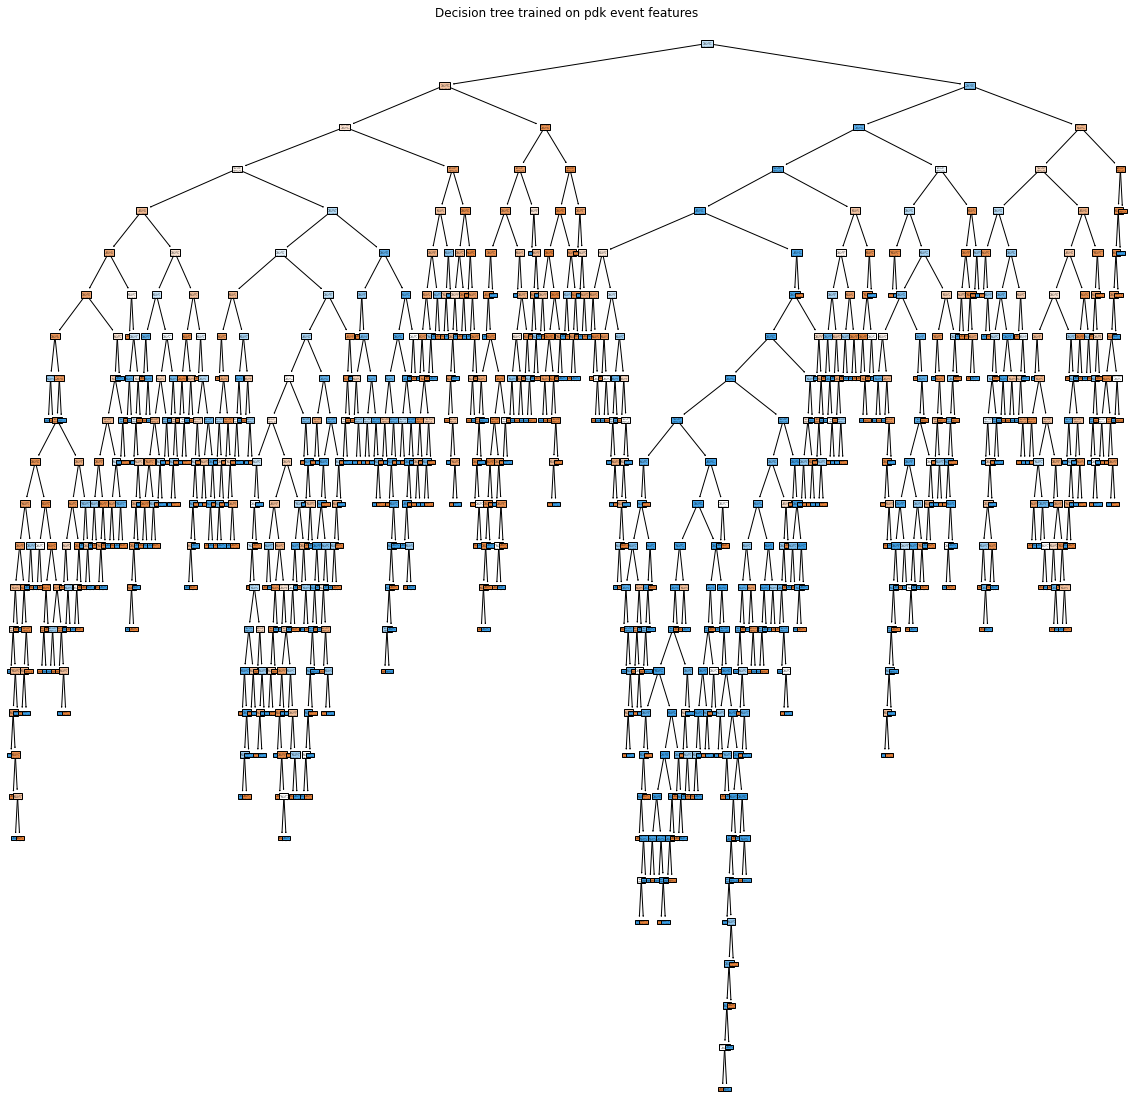

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(clf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [16]:
clf.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [17]:
clf_score = clf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", clf_score )

The score of the Decision tree classifier is  0.776885043263288


In [18]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

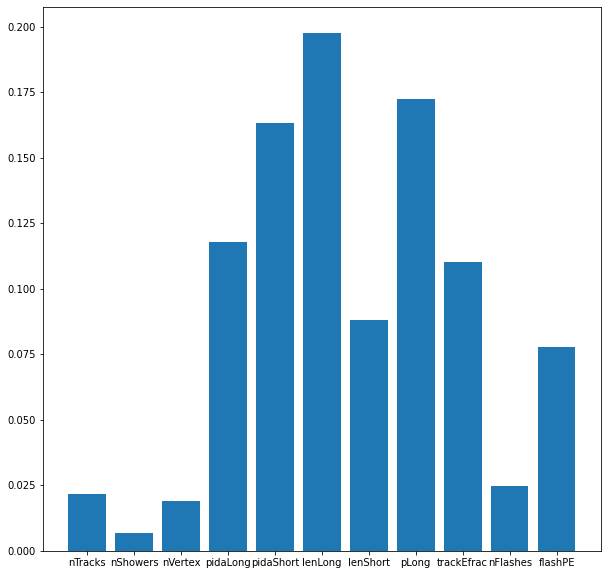

In [19]:
plt.figure(figsize=[10,10])
plt.bar(head_list,clf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

## Here we try a Gradient Boosting Classifier

In [20]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [21]:
gbc = ensemble.GradientBoostingClassifier()

In [22]:
gbc.fit(X_train,y_train)
gbc_preds=gbc.predict(X_test)

In [23]:
gbc_score= gbc.score(X_test,y_test)
print(gbc_score)

0.8374536464771323


It does pretty okay, but can we improve some

In [24]:
classification_report(y_test,gbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.82      0.78      0.80       681\n           1       0.85      0.88      0.86       937\n\n    accuracy                           0.84      1618\n   macro avg       0.83      0.83      0.83      1618\nweighted avg       0.84      0.84      0.84      1618\n'

In [25]:
confusion_matrix(y_test,gbc_preds)

array([[533, 148],
       [115, 822]])

In [26]:
y_scores_gb = gbc.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.91


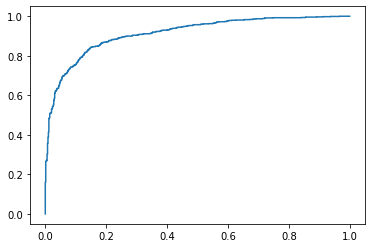

In [27]:
plt.figure()
plt.plot(fpr_gb,tpr_gb)

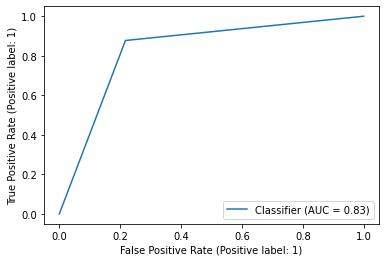

In [28]:
RocCurveDisplay.from_predictions(y_test,gbc_preds)

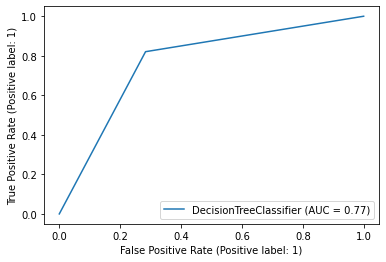

In [29]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)

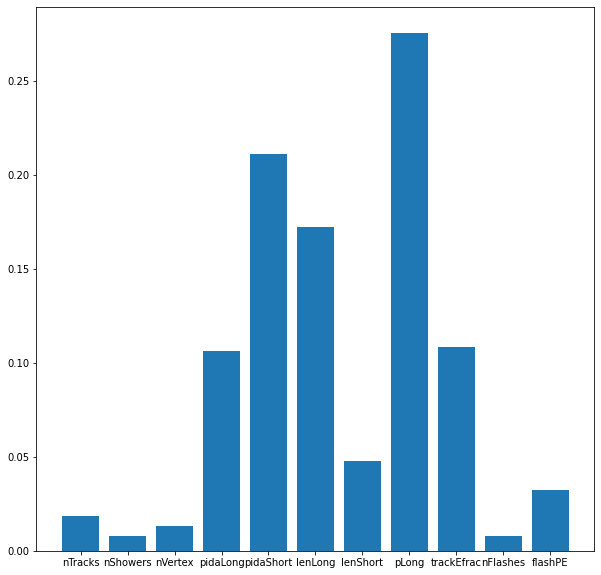

In [30]:
plt.figure(figsize=[10,10])
plt.bar(head_list,gbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [31]:
gbc.feature_importances_

array([0.01852599, 0.00772228, 0.01294303, 0.10604513, 0.21107645,
       0.17199992, 0.04762328, 0.27521194, 0.10825017, 0.00803584,
       0.03256596])

## What about an SVC? 

In [152]:
svc = svm.NuSVC()
svc.fit(X_train,y_train)
svc_score=svc.score(X_test,y_test)
print (svc_score)

0.6489493201483313


In [147]:
from sklearn.ensemble import RandomForestClassifier
rfC = RandomForestClassifier()
rfC.fit(X_train,y_train)
rfC_score=rfC.score(X_test,y_test)
print (rfC_score)

0.8454882571075402


In [151]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train,y_train)
NBC_score = NBC.score(X_test,y_test)
print(NBC_score)

0.7478368355995055


In [75]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
nnCLF.fit(X_train,y_train)
nnCLF_score=nnCLF.score(X_test,y_test)
print(nnCLF_score)

0.6983930778739185


In [191]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver = 'adam', learning_rate='invscaling', verbose = 1,random_state=8)
nnCLF.fit(X_train,y_train)
nnCLF_score=nnCLF.score(X_test,y_test)
print(nnCLF_score)

Iteration 1, loss = 5.07673109
Iteration 2, loss = 1.85453283
Iteration 3, loss = 1.01426047
Iteration 4, loss = 0.77196281
Iteration 5, loss = 0.74940000
Iteration 6, loss = 0.77200067
Iteration 7, loss = 0.65419108
Iteration 8, loss = 0.68117876
Iteration 9, loss = 0.63608718
Iteration 10, loss = 0.66846357
Iteration 11, loss = 0.59795015
Iteration 12, loss = 0.62895280
Iteration 13, loss = 0.68060785
Iteration 14, loss = 0.58620587
Iteration 15, loss = 0.64519210
Iteration 16, loss = 0.64105438
Iteration 17, loss = 0.57964028
Iteration 18, loss = 0.57654640
Iteration 19, loss = 0.72688576
Iteration 20, loss = 0.67751375
Iteration 21, loss = 0.59903914
Iteration 22, loss = 0.73526268
Iteration 23, loss = 0.62365503
Iteration 24, loss = 0.56995904
Iteration 25, loss = 0.67147163
Iteration 26, loss = 0.69661645
Iteration 27, loss = 0.60005748
Iteration 28, loss = 0.70740399
Iteration 29, loss = 0.74060845
Iteration 30, loss = 0.79225412
Iteration 31, loss = 0.71933598
Iteration 32, los

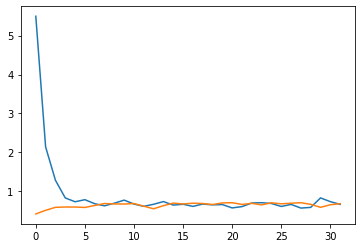

In [188]:
plt.plot(nnCLF.loss_curve_)
plt.plot(nnCLF.validation_scores_)

In [189]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5,weights = 'distance',algorithm='auto')
neigh.fit(X_train,y_train)
neigh_score=neigh.score(X_test,y_test)
print(neigh_score)

0.7243510506798516


# OKAY, let us do the same thing but for the flash matched set

In [112]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo_flash = pd.read_csv("atmotree_flash.csv",names=head_list,header=None,index_col=False)
pdk_flash = pd.read_csv("pdktree_flash.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [113]:
#atmo_flash.head()

In [114]:
#pdk_flash.head()

In [115]:
pdk_fdf = atmo_flash
pdk_fdf=pdk_fdf.append(pdk_flash,ignore_index=True)
pdk_fdf=pdk_fdf.drop(["trkE","EmE","visE"],axis=1)

In [116]:
import seaborn as sb

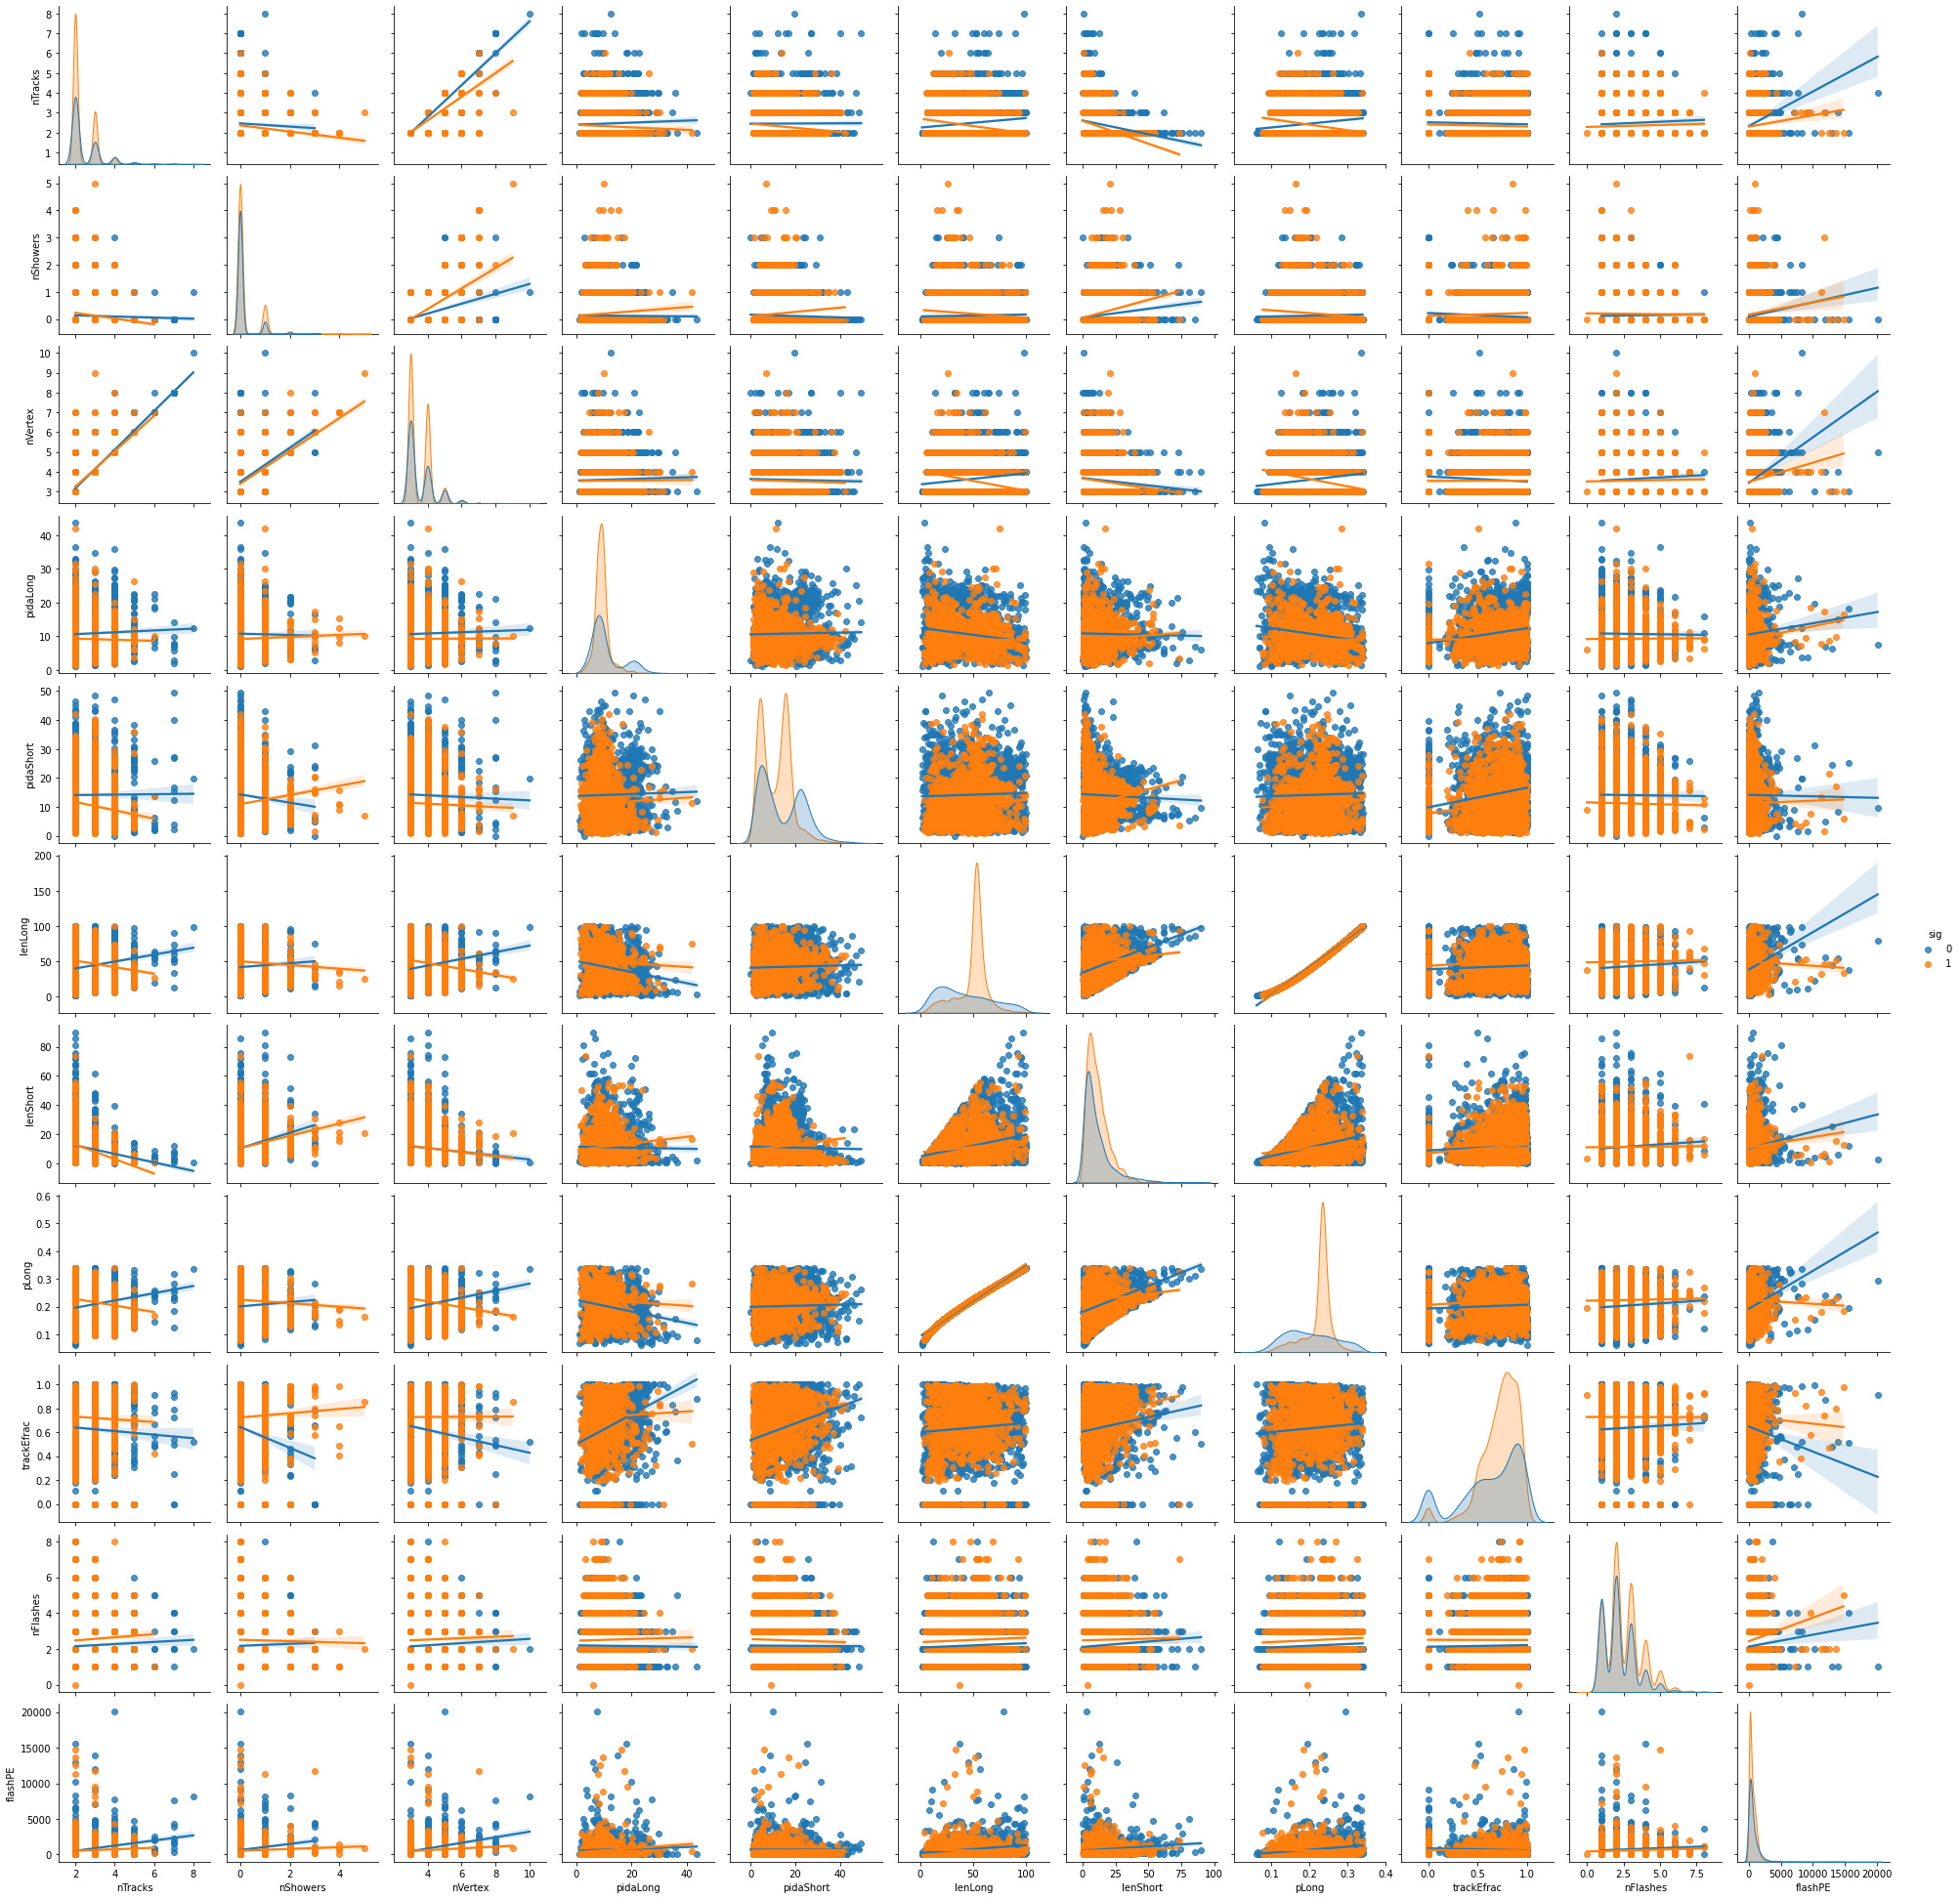

In [117]:
sb.pairplot(data=pdk_fdf,kind="reg",hue="sig")

In [118]:
pdk_ftarget = pdk_fdf.sig

# Pull off the "signal" column to use as the target for our ML models

In [119]:
pdk_ftarget
pdk_fdf=pdk_fdf.drop(["sig"],axis=1)

# Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [120]:
Xf_train, Xf_test, yf_train, yf_test =train_test_split(pdk_fdf, pdk_ftarget, test_size = 0.3)
Xf_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
3980,2,0,3,7.80302,3.47240,54.4461,4.37025,0.236721,0.671572,1,214.222
1438,2,0,3,6.17700,8.04902,80.5194,22.80920,0.296707,0.822921,3,118.028
1056,3,0,4,9.43319,3.57528,77.9703,5.40059,0.290965,0.887520,1,1480.870
3711,2,0,3,6.38428,12.36200,18.7462,15.15410,0.142475,0.428187,3,1704.680
2032,4,0,5,21.09340,24.89070,32.9071,6.58693,0.183106,0.990708,1,1433.800


In [121]:
yf_train.head()

3980    1
1438    0
1056    0
3711    1
2032    0
Name: sig, dtype: int64

In [122]:
from sklearn import tree
from sklearn import svm

# Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [123]:
Fclf=tree.DecisionTreeClassifier()
Fclf.fit(Xf_train,yf_train)

DecisionTreeClassifier()

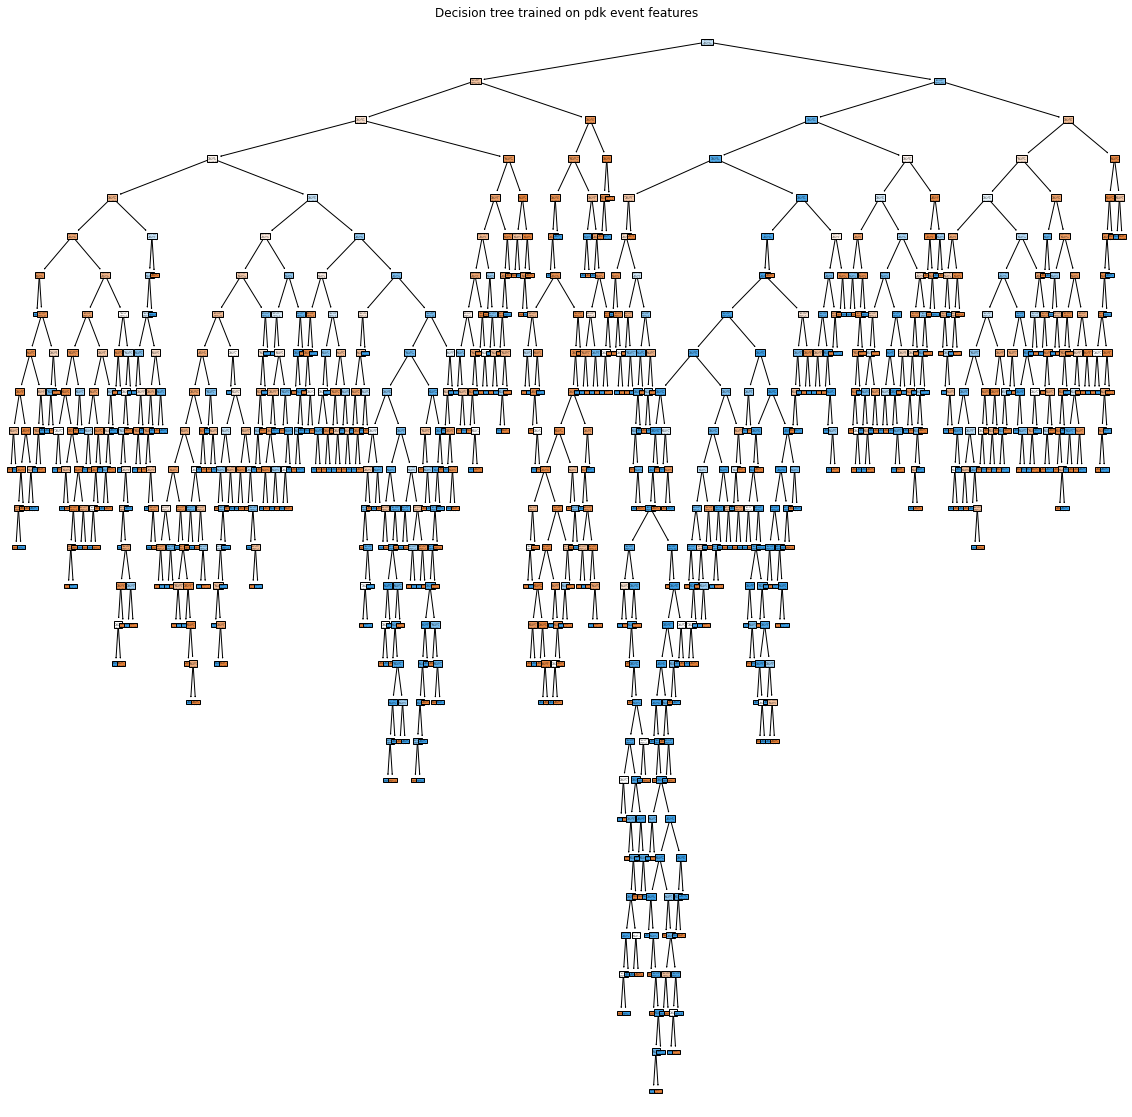

In [124]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(Fclf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [125]:
Fclf.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

In [126]:
Fclf_score= Fclf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", Fclf_score)

The score of the Decision tree classifier is  0.9351050679851669


In [127]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

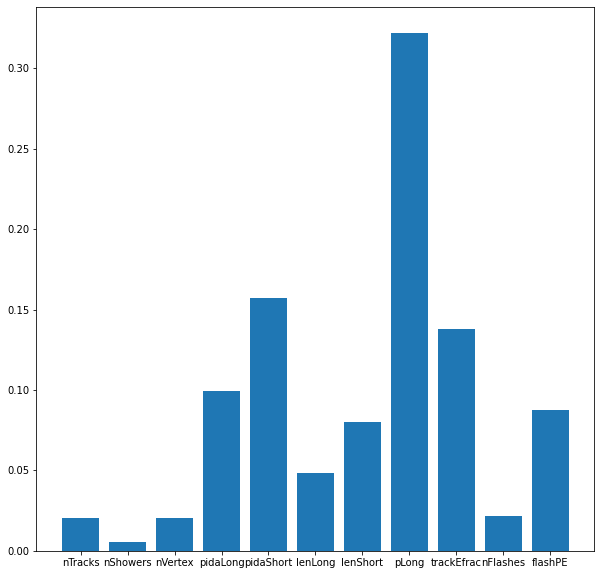

In [128]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fclf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

# Here we try a Gradient Boosting Classifier

In [129]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [130]:
Fgbc = ensemble.GradientBoostingClassifier()

In [131]:
Fgbc.fit(Xf_train,yf_train)
Fgbc_preds=gbc.predict(Xf_test)

In [132]:
Fgbc_score = Fgbc.score(Xf_test,yf_test)
print(Fgbc_score)

0.841358024691358


It does pretty okay, but can we improve some

In [133]:
classification_report(yf_test,Fgbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.86      0.82      0.84       666\n           1       0.88      0.91      0.89       954\n\n    accuracy                           0.87      1620\n   macro avg       0.87      0.87      0.87      1620\nweighted avg       0.87      0.87      0.87      1620\n'

In [134]:
confusion_matrix(yf_test,Fgbc_preds)

array([[547, 119],
       [ 87, 867]])

In [135]:
yf_scores_gb = Fgbc.decision_function(Xf_test)
ffpr_gb, ftpr_gb, _ = roc_curve(yf_test, yf_scores_gb)
froc_auc_gb = auc(ffpr_gb, ftpr_gb)

print("Area under ROC curve = {:0.2f}".format(froc_auc_gb))

Area under ROC curve = 0.92


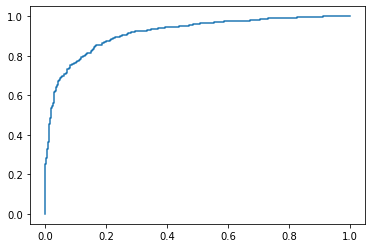

In [136]:
plt.figure()
plt.plot(ffpr_gb,ftpr_gb)

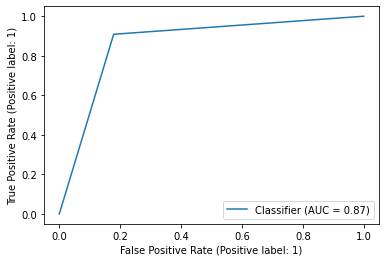

In [137]:
RocCurveDisplay.from_predictions(yf_test,Fgbc_preds)

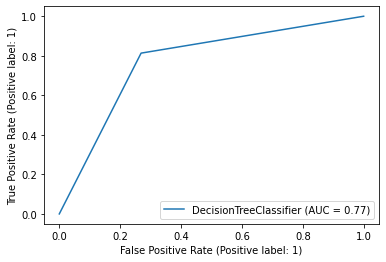

In [138]:
RocCurveDisplay.from_estimator(Fclf,Xf_test,yf_test)

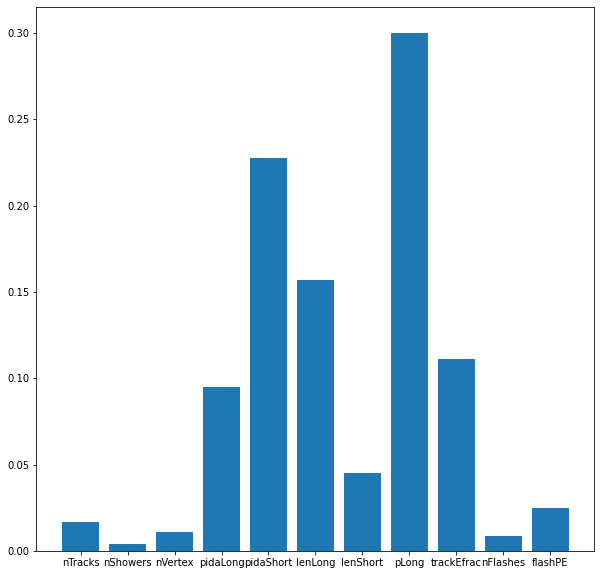

In [139]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fgbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [140]:
Fgbc.feature_importances_

array([0.01692334, 0.00368597, 0.01108197, 0.09481583, 0.22758732,
       0.15671087, 0.04488733, 0.30003727, 0.11088018, 0.00833727,
       0.02505265])

# What about an SVC? 

In [64]:
Fgbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
Fgbc5.fit(Xf_train,yf_train)
Fgbc5.score(Xf_test,yf_test)

0.8401234567901235

In [160]:
Fsvc = svm.NuSVC()
Fsvc.fit(Xf_train,yf_train)
Fsvc_score = Fsvc.score(Xf_test,yf_test)
print(Fsvc_score)

0.5969135802469135


In [154]:
FrfC = RandomForestClassifier()
FrfC.fit(Xf_train,yf_train)
FrfC_score=rfC.score(Xf_test,yf_test)
print (FrfC_score)

0.9524691358024692


In [169]:
FNBC = GaussianNB()
FNBC.fit(Xf_train,yf_train)
FNBC_score = NBC.score(Xf_test,yf_test)
print(FNBC_score)

0.7555555555555555


In [155]:
from sklearn.neural_network import MLPClassifier
FnnCLF = MLPClassifier(solver='adam', alpha=1e-5)
FnnCLF.fit(Xf_train,yf_train)
FnnCLF_score = FnnCLF.score(Xf_test,yf_test)

In [143]:
FnnCLF = MLPClassifier(solver = 'adam', learning_rate='invscaling', verbose = 1,random_state=8)
FnnCLF.fit(Xf_train,yf_train)
FnnCLF_score=nnCLF.score(Xf_test,yf_test)
print(FnnCLF_score)

Iteration 1, loss = 5.02795126
Iteration 2, loss = 1.84541513
Iteration 3, loss = 1.05692627
Iteration 4, loss = 1.05506174
Iteration 5, loss = 0.78922589
Iteration 6, loss = 0.76444162
Iteration 7, loss = 0.97791456
Iteration 8, loss = 0.84219488
Iteration 9, loss = 0.66907487
Iteration 10, loss = 0.65056232
Iteration 11, loss = 0.60539364
Iteration 12, loss = 0.61720271
Iteration 13, loss = 0.58802268
Iteration 14, loss = 0.59258228
Iteration 15, loss = 0.58748335
Iteration 16, loss = 0.57250680
Iteration 17, loss = 0.58736087
Iteration 18, loss = 0.62665624
Iteration 19, loss = 0.58015360
Iteration 20, loss = 0.61955281
Iteration 21, loss = 0.67070841
Iteration 22, loss = 0.65059234
Iteration 23, loss = 0.55825722
Iteration 24, loss = 0.58384256
Iteration 25, loss = 0.64387824
Iteration 26, loss = 0.59077866
Iteration 27, loss = 0.64729872
Iteration 28, loss = 0.58108686
Iteration 29, loss = 0.59850186
Iteration 30, loss = 0.55605869
Iteration 31, loss = 0.56637244
Iteration 32, los

# How do the scores match up?

In [170]:
scores_df_dict = {"Classifier":["DecTree","GBC","SVC","NN","RanForest","NaiveBayes"],
                  "Prod":[clf_score,gbc_score,svc_score,nnCLF_score,rfC_score,NBC_score],
                  "Flash Matched":[Fclf_score,Fgbc_score,Fsvc_score,FnnCLF_score,FrfC_score,FNBC_score]}
scores_df=pd.DataFrame(scores_df_dict)
scores_df=scores_df.set_index("Classifier")

<AxesSubplot:xlabel='Classifier', ylabel='Score'>

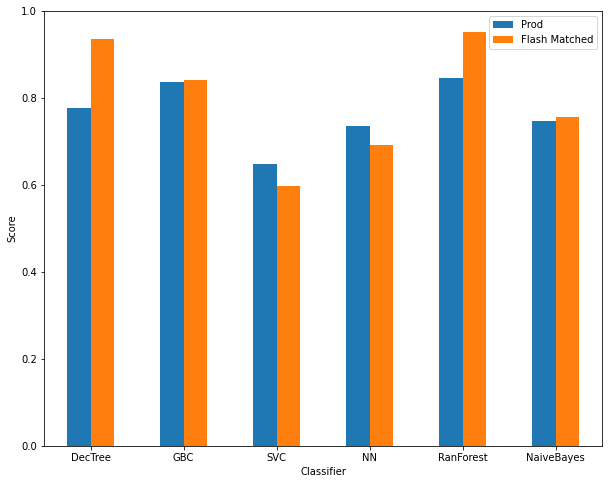

In [171]:
scores_df.plot(kind="bar",figsize=[10,8],ylabel="Score",rot=0)

## Since the parameter space for the PDK is so high, it the 'simpler' models seem to perform better - though, there is very little tuning done here

Text(-0.027591905734482836, flashPE, 'Flash Matched')

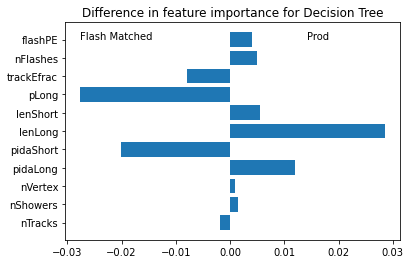

In [67]:
import_diff = clf.feature_importances_ - Fclf.feature_importances_
Flabel_x = import_diff.min()
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Decision Tree")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

Text(-0.024825328642393008, flashPE, 'Flash Matched')

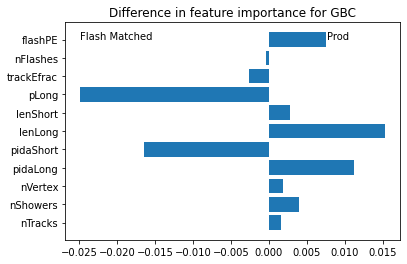

In [172]:
import_diff = gbc.feature_importances_ - Fgbc.feature_importances_
Flabel_x = (import_diff.min())
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for GBC")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

Text(-0.015218314839238384, flashPE, 'Flash Matched')

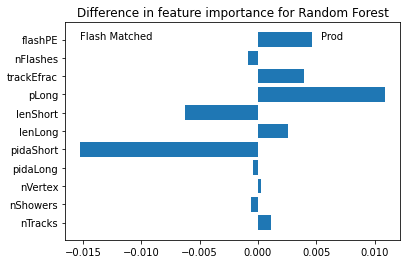

In [174]:
import_diff = rfC.feature_importances_ - FrfC.feature_importances_
Flabel_x = import_diff.min()
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Random Forest")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

# It seems the importance of the enery (momentum) increases when better t0 matching (flash matching) is implemented?

Text(-6, 200, 'Kolmogorov-Smirnov test:\n sig(bkg) probability: 0.24 (0.00042)')

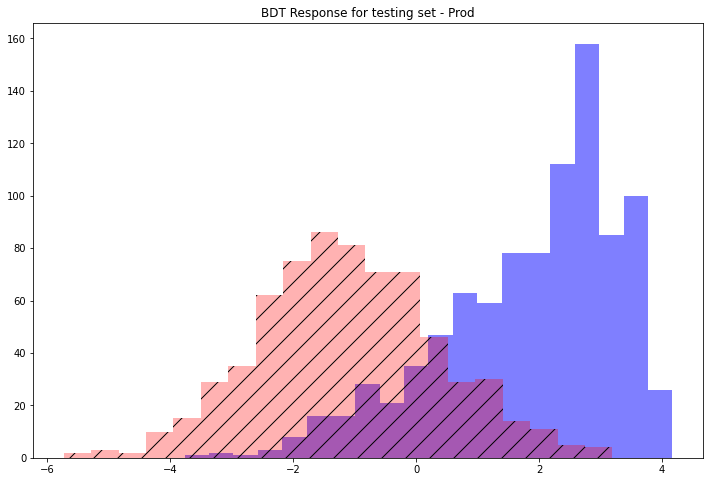

In [166]:
from scipy.stats import ks_2samp
plt.figure(figsize=[12,8])
plotset = X_test.join(y_test)

plotset_sig = plotset[plotset.sig==1].drop('sig',axis=1)
plotset_bckgd = plotset[plotset.sig==0].drop('sig',axis=1)
plt.hist(gbc.decision_function(plotset_sig),color='blue',histtype='bar',alpha=.5,bins=20)
plt.hist(gbc.decision_function(plotset_bckgd),color='red',histtype='bar',alpha=.3,hatch='/',bins=20)
plt.title("BDT Response for testing set - Prod")

trainset = X_train.join(y_train)

trainset_sig = trainset[trainset.sig==1].drop('sig',axis=1)
trainset_bckgd = trainset[trainset.sig==0].drop('sig',axis=1)

sig_kstat, sig_kp = ks_2samp(gbc.decision_function(trainset_sig),gbc.decision_function(plotset_sig))
bkg_kstat, bkg_kp = ks_2samp(gbc.decision_function(trainset_bckgd),gbc.decision_function(plotset_bckgd))
plt.annotate(("Kolmogorov-Smirnov test:\n sig(bkg) probability: "
              +str(round(sig_kp,3))+" ("+str(round(bkg_kp,5))+")"),xy=[-6,200])

Text(-5, 250, 'Kolmogorov-Smirnov test:\n sig(bkg) probability: 0.176 (0.02065)')

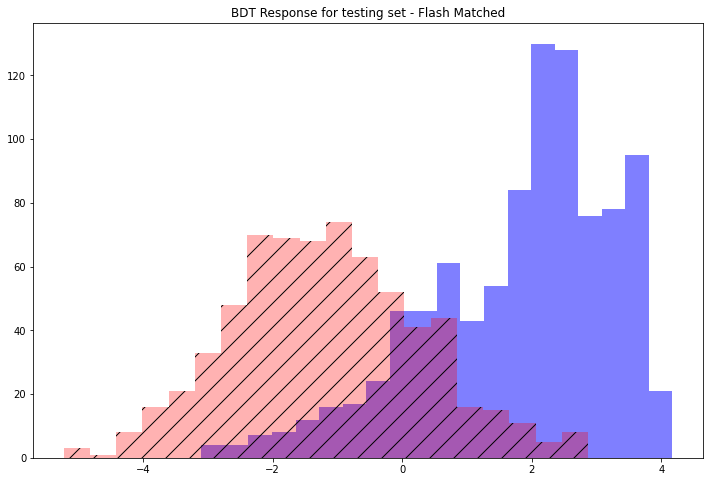

In [165]:
fplotset = Xf_test.join(yf_test)
plt.figure(figsize=[12,8])

fplotset_sig = fplotset[fplotset.sig==1].drop('sig',axis=1)
fplotset_bckgd = fplotset[fplotset.sig==0].drop('sig',axis=1)
plt.hist(Fgbc.decision_function(fplotset_sig),color='blue',histtype='bar',alpha=.5,bins=20)
plt.hist(Fgbc.decision_function(fplotset_bckgd),color='red',histtype='bar',alpha=.3,hatch='/',bins=20)
plt.title("BDT Response for testing set - Flash Matched")

ftrainset = Xf_train.join(yf_train)

ftrainset_sig = ftrainset[ftrainset.sig==1].drop('sig',axis=1)
ftrainset_bckgd = ftrainset[ftrainset.sig==0].drop('sig',axis=1)

fsig_kstat, fsig_kp = ks_2samp(Fgbc.decision_function(ftrainset_sig),Fgbc.decision_function(fplotset_sig))
fbkg_kstat, fbkg_kp = ks_2samp(Fgbc.decision_function(ftrainset_bckgd),Fgbc.decision_function(fplotset_bckgd))
plt.annotate(("Kolmogorov-Smirnov test:\n sig(bkg) probability: "
              +str(round(fsig_kp,3))+" ("+str(round(fbkg_kp,5))+")"),xy=[-5,250])